In [2]:
import pandas as pd
import numpy as np
from numpy import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import display, Markdown
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [4]:
df_returns = pd.read_csv('data/returns.csv')
df_close = pd.read_csv('data/close.csv')
df_returns.head()

,AAVEUSDT,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,FILUSDT,KSMUSDT,LINKUSDT,LTCUSDT,MATICUSDT,MKRUSDT,NEOUSDT,SOLUSDT,THETAUSDT,TRXUSDT,UNIUSDT,VETUSDT,XLMUSDT,XRPUSDT,XTZUSDT
0,-0.008507,0.002925,0.000000,0.002967,0.003518,0.000879,0.002309,0.009608,0.002637,0.005369,-0.003747,0.006832,0.001501,0.001841,0.010971,0.006016,0.001256,0.008701,0.002347,-0.000598,0.005292,0.000307,-0.000371,0.011399,0.004405,0.004495,0.001557,0.008696
1,0.001581,-0.005103,0.005371,-0.000925,0.001497,0.005657,0.002227,0.005383,0.000000,0.040167,0.001504,0.000000,0.003311,-0.003162,0.007937,0.006486,0.007884,0.004025,0.004733,0.001685,0.002219,-0.002452,0.004080,0.001856,0.002234,0.000707,0.003498,0.011797
2,0.024599,0.006870,0.006914,0.005367,-0.004157,0.004655,0.005345,-0.001721,0.005635,-0.012723,0.003380,0.005714,0.006720,-0.001629,-0.011324,0.002762,0.000356,0.004582,0.005444,0.006403,0.011999,0.004455,0.001108,-0.003243,0.020061,0.006472,0.000000,0.015247
3,-0.006210,0.001729,-0.005618,-0.002761,-0.001208,-0.003507,-0.003487,0.005555,0.000374,-0.010400,-0.001497,-0.002308,-0.001938,-0.023059,-0.001551,0.007929,-0.011196,-0.005131,-0.001623,-0.000647,-0.004529,-0.012236,-0.002214,-0.000133,-0.004613,0.005963,-0.003873,-0.004859
4,0.000172,0.000000,-0.006905,0.005354,0.000037,0.003261,0.000297,0.011430,0.000373,0.005483,0.000375,-0.001958,0.002014,-0.005670,-0.003424,0.008115,-0.002157,-0.001146,0.001476,0.000917,0.007054,0.005574,-0.001479,0.027157,0.010570,0.001627,0.004277,0.001775


In [5]:
df_returns.describe()

,AAVEUSDT,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,FILUSDT,KSMUSDT,LINKUSDT,LTCUSDT,MATICUSDT,MKRUSDT,NEOUSDT,SOLUSDT,THETAUSDT,TRXUSDT,UNIUSDT,VETUSDT,XLMUSDT,XRPUSDT,XTZUSDT
count,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000
mean,0.000112,0.000105,0.000057,0.000093,0.000075,0.000137,0.000076,0.000065,0.000246,0.000082,0.000020,0.000123,0.000106,0.000029,0.000091,0.000076,0.000066,0.000216,0.000113,0.000061,0.000240,0.000119,0.000088,0.000124,0.000110,0.000077,0.000093,0.000042
std,0.013323,0.011270,0.012597,0.012903,0.011011,0.009355,0.006955,0.013125,0.015949,0.011835,0.011219,0.012310,0.008797,0.012289,0.013589,0.011649,0.010485,0.014524,0.011890,0.012061,0.014467,0.013277,0.009179,0.012894,0.012845,0.011969,0.012094,0.012004
min,-0.226765,-0.224386,-0.194922,-0.313760,-0.280380,-0.164481,-0.094254,-0.273921,-0.263372,-0.334011,-0.276467,-0.275387,-0.143181,-0.278148,-0.398873,-0.248793,-0.258360,-0.176471,-0.183769,-0.287265,-0.283531,-0.286997,-0.222425,-0.241645,-0.247540,-0.488242,-0.207744,-0.389622
25%,-0.005503,-0.004454,-0.005319,-0.005150,-0.003971,-0.003123,-0.002480,-0.005643,-0.004296,-0.004604,-0.004159,-0.004421,-0.003125,-0.004700,-0.005571,-0.004995,-0.003980,-0.005204,-0.004752,-0.004845,-0.005823,-0.005422,-0.002646,-0.005172,-0.005038,-0.004056,-0.003876,-0.004739
50%,0.000000,0.000000,0.000000,0.000086,0.000091,0.000162,0.000075,0.000107,0.000079,0.000000,0.000000,0.000064,0.000084,0.000000,0.000000,0.000132,0.000147,0.000000,0.000130,0.000111,0.000000,0.000135,0.000256,0.000063,0.000000,0.000178,0.000173,0.000000
75%,0.005663,0.004542,0.005571,0.005266,0.004108,0.003421,0.002653,0.005796,0.004362,0.004743,0.004488,0.004486,0.003390,0.004715,0.005705,0.005175,0.004192,0.005270,0.004937,0.005043,0.005887,0.005772,0.002965,0.005391,0.005266,0.004199,0.004000,0.004994
max,0.161978,0.159306,0.228885,0.248356,0.432869,0.149518,0.126653,0.292098,0.679489,0.220124,0.157872,0.231818,0.092547,0.173194,0.349365,0.122500,0.246825,0.356449,0.280327,0.219978,0.305243,0.193344,0.318559,0.546289,0.303068,0.572634,0.283029,0.259653


<Axes: >

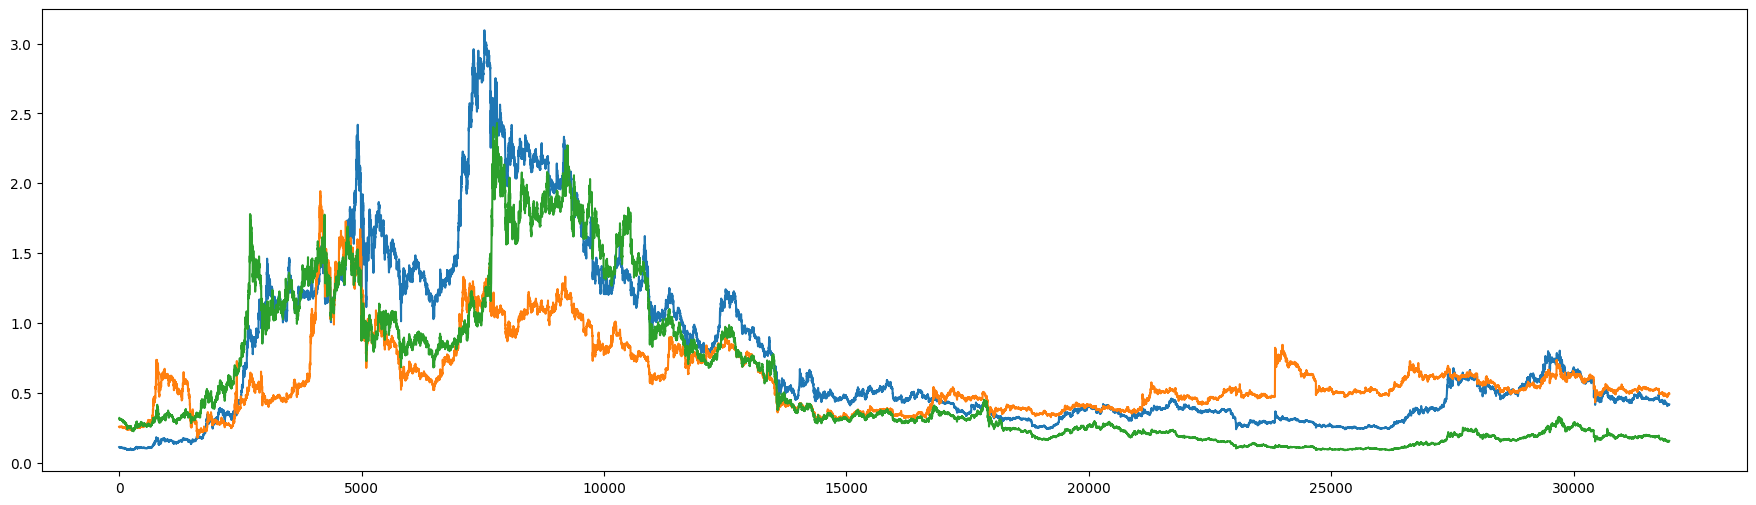

In [6]:
# It would be nice to show a better ploting then this one.

df_close['ADAUSDT'].plot(figsize=(22, 6))
df_close['XRPUSDT'].plot(figsize=(22, 6))
df_close['ALGOUSDT'].plot(figsize=(22, 6))

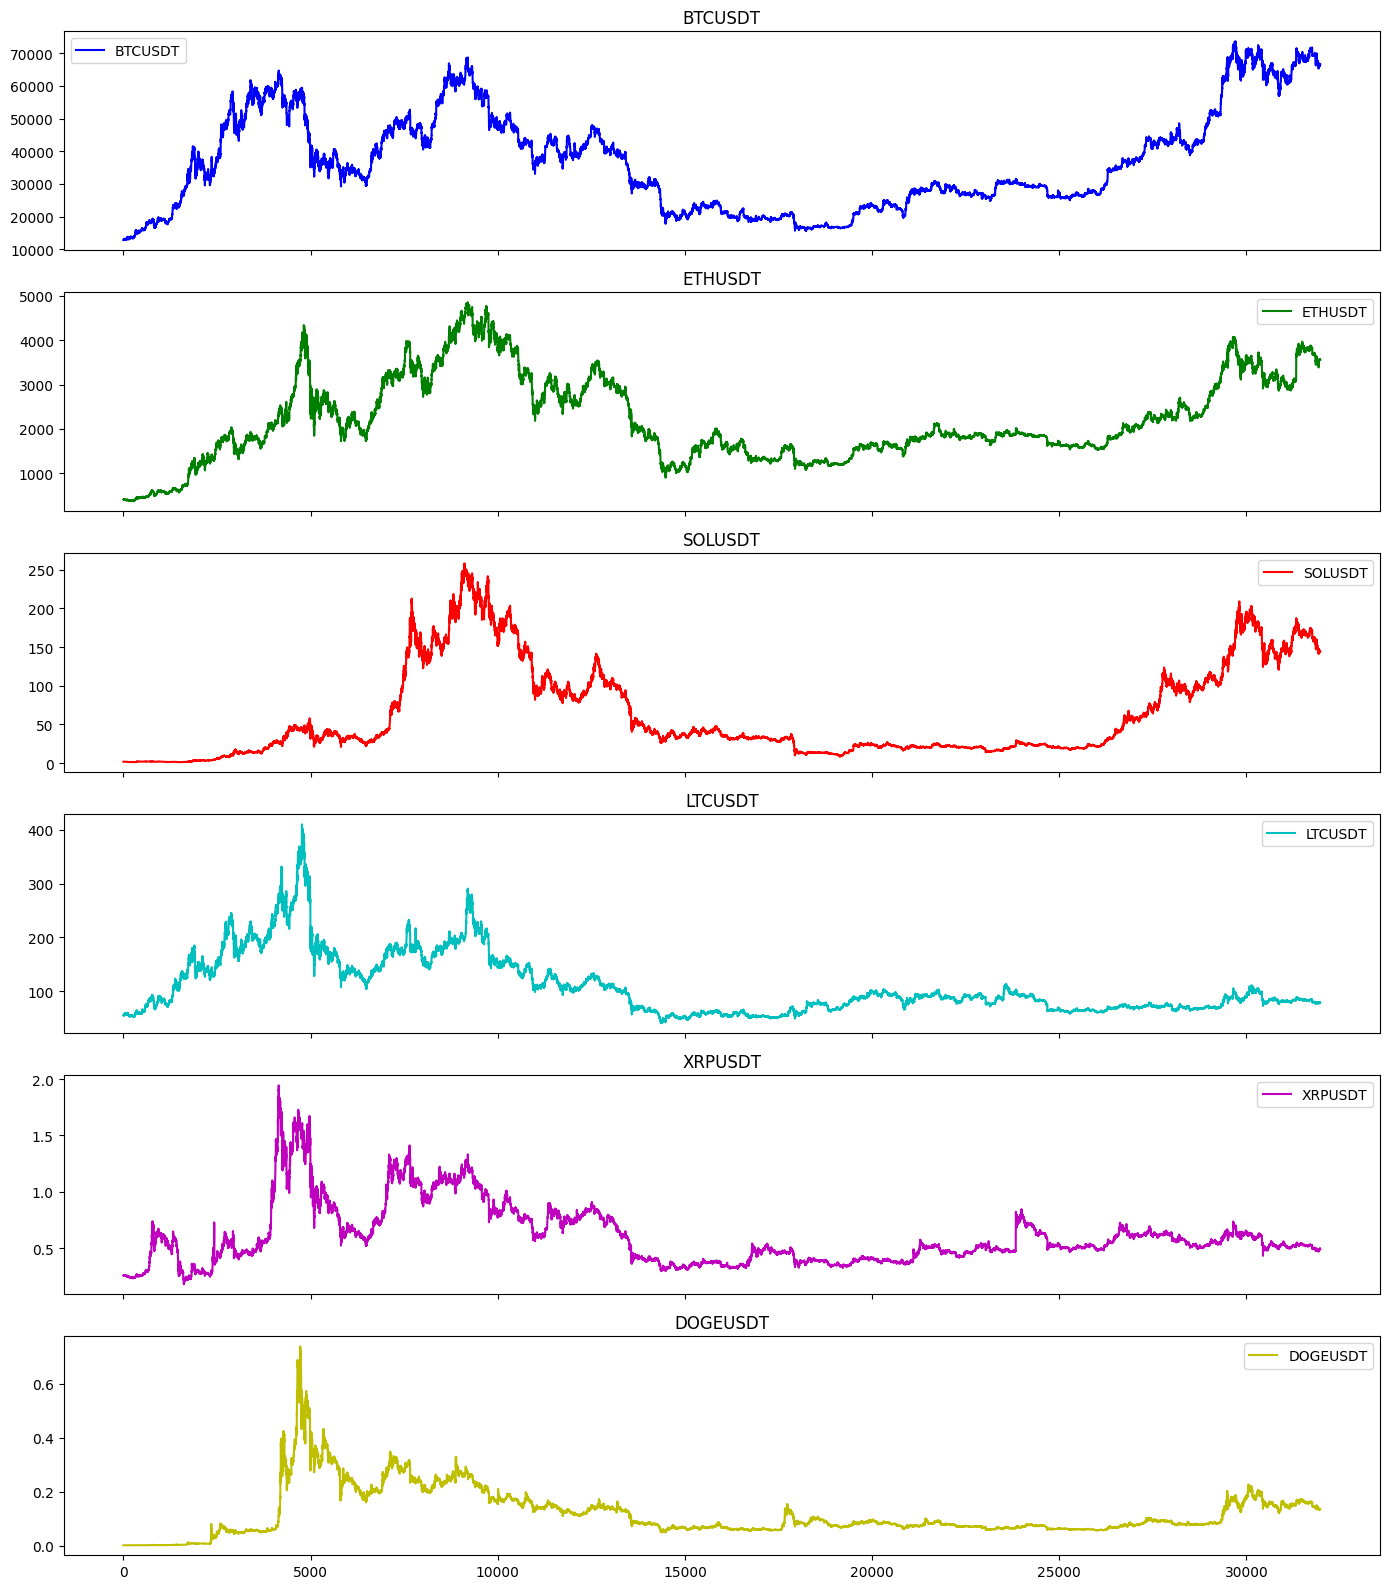

In [7]:
# Plotting
selected_columns = ['BTCUSDT', 'ETHUSDT','SOLUSDT', 'LTCUSDT', 'XRPUSDT',  'DOGEUSDT']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(14, 16), sharex=True)
for ax, column, color in zip(axes, selected_columns, colors):
    ax.plot(df_close[column], label=column, color=color)
    ax.set_title(column)
    ax.legend()

plt.tight_layout()
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
# This would take a while to run...
# df_res = grangers_causation_matrix(df_returns, variables = df_returns.columns) 


In [8]:
df_res = pd.read_csv('results/p_values_matrix.csv')
print('''Check Granger Causality of all possible combinations of the Time series. 
The rows are the response variable, columns are predictors. The values in the table 
are the P-Values. P-Values lesser than the significance level (0.05), implies 
the Null Hypothesis that the coefficients of the corresponding past values is 
zero, that is, the X does not cause Y can be rejected.''')
df_res

Check Granger Causality of all possible combinations of the Time series. 
The rows are the response variable, columns are predictors. The values in the table 
are the P-Values. P-Values lesser than the significance level (0.05), implies 
the Null Hypothesis that the coefficients of the corresponding past values is 
zero, that is, the X does not cause Y can be rejected.


,Unnamed: 0,AAVEUSDT_x,ADAUSDT_x,ALGOUSDT_x,ATOMUSDT_x,BCHUSDT_x,BNBUSDT_x,BTCUSDT_x,COMPUSDT_x,DOGEUSDT_x,DOTUSDT_x,EOSUSDT_x,ETCUSDT_x,ETHUSDT_x,FILUSDT_x,KSMUSDT_x,LINKUSDT_x,LTCUSDT_x,MATICUSDT_x,MKRUSDT_x,NEOUSDT_x,SOLUSDT_x,THETAUSDT_x,TRXUSDT_x,UNIUSDT_x,VETUSDT_x,XLMUSDT_x,XRPUSDT_x,XTZUSDT_x
0,AAVEUSDT_y,1.0000,0.0089,0.0014,0.0001,0.0000,0.0000,0.0000,0.0000,0.1814,0.0001,0.0000,0.0000,0.0000,0.4226,0.0018,0.0000,0.0051,0.0003,0.0000,0.0000,0.0280,0.0007,0.0000,0.0000,0.0000,0.0000,0.0001,0.0010
1,ADAUSDT_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0072,0.0000,0.0000,0.0000,0.0000,0.0040,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.0003,0.0000,0.0000,0.0000,0.0041,0.0000,0.0000,0.0000
2,ALGOUSDT_y,0.1408,0.0167,1.0000,0.0190,0.0000,0.0002,0.0000,0.0088,0.0099,0.0015,0.0011,0.0028,0.0000,0.1456,0.0620,0.0034,0.0728,0.0000,0.0007,0.0000,0.0004,0.0032,0.0000,0.0047,0.0000,0.0117,0.0264,0.0002
3,ATOMUSDT_y,0.0003,0.0095,0.0007,1.0000,0.0000,0.0000,0.0001,0.0012,0.0487,0.0005,0.0087,0.0367,0.0017,0.2506,0.0000,0.0009,0.0076,0.0000,0.0000,0.0004,0.0000,0.1036,0.0000,0.0000,0.0035,0.0000,0.0005,0.0000
4,BCHUSDT_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0116,0.0000,0.0000,0.0000
5,BNBUSDT_y,0.0022,0.0000,0.0008,0.0000,0.0000,1.0000,0.0003,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0027,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
6,BTCUSDT_y,0.0000,0.0002,0.0000,0.0000,0.0000,0.0003,1.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0064,0.0000,0.0000,0.0071,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0021,0.0000,0.0000,0.0018,0.0000
7,COMPUSDT_y,0.0075,0.0624,0.0045,0.0000,0.0000,0.0000,0.0000,1.0000,0.0277,0.0000,0.0001,0.0353,0.0003,0.0788,0.0671,0.0085,0.0005,0.0423,0.0000,0.0012,0.0137,0.0002,0.0000,0.0000,0.0018,0.0018,0.0002,0.0090
8,DOGEUSDT_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,DOTUSDT_y,0.0025,0.0000,0.0000,0.0017,0.0000,0.0000,0.0424,0.0000,0.1968,1.0000,0.0000,0.0001,0.0001,0.0016,0.0000,0.0000,0.1380,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000,0.0000,0.0021,0.0000,0.0028,0.0003


In [9]:
counter = 0 
df_res.iloc[1:,1:] = df_res.iloc[1:,1:].astype(float)
for c in range(df_res.shape[0]):
    for r in range(df_res.shape[0]):
        if c > 0 and r > 0:
            if df_res.iloc[r, c] > 0.05:
                counter += 1
print(f'Out of {df_res.shape[0] * df_res.shape[1]} P-values, only {counter} are above the 0.05 significance level, which is about {round(counter / (df_res.shape[0] * df_res.shape[1]) * 100)}%.')          
print('''Considering the P-Values in the above table, we can pretty much observe that all the variables
(time series) in the system are interchangeably causing each other.
This makes this system of multi time series a good candidate for using VAR models to forecast.''')      

Out of 812 P-values, only 52 are above the 0.05 significance level, which is about 6%.
Considering the P-Values in the above table, we can pretty much observe that all the variables
(time series) in the system are interchangeably causing each other.
This makes this system of multi time series a good candidate for using VAR models to forecast.


In [10]:
nobs = 4
df_train, df_test = df_returns[0:-nobs], df_returns[-nobs:]
# Check size 119 rows of train set and only 4 rows of test set
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(31969, 28)
(4, 28)


In [13]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    if p_value <= signif:
        print(f" => Series is Stationary.")
    else:
        print(f" => Series is Non-Stationary.")


# ADF Test on each time series column
for name, column in df_returns.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AAVEUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ADAUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALGOUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ATOMUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BCHUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BNBUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BTCUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "COMPUSDT" 
    -----------------------------------------------
 => Seri

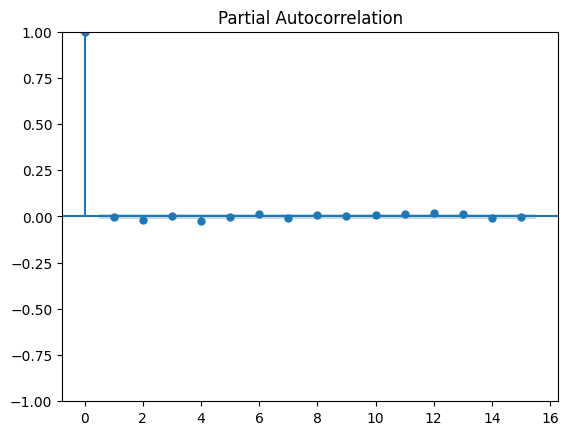

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_returns['BTCUSDT'], lags=15)
plt.show()

In [19]:
def find_best_lag(df, coin_1, coin_2, lags_range):
    max_lag = -1
    max_score = 0
    for lag in range(1, lags_range):
        coin_1_series = df_returns[f'{coin_1}'].iloc[lag:]
        coin_2_lagged_series = df_returns[f'{coin_2}'].iloc[:-lag]
        corlation, p_value = pearsonr(coin_1_series, coin_2_lagged_series)
        if p_value < 0.05:
            score = abs(corlation)
            if score > max_score:
                max_score = score
                max_lag = lag
                        
    print(f'For the coin {coin_1} with the predictor {coin_2} The best lag is {max_lag} with a score of {max_score}')
    
coins = df_returns.columns
for coin_1 in coins:
    for coin_2 in coins:
        if coin_1 != coin_2:
            find_best_lag(df_returns, coin_1, coin_2, 10)

For the coin AAVEUSDT with the predictor ADAUSDT The best lag is 2 with a score of 0.022053985729174136
For the coin AAVEUSDT with the predictor ALGOUSDT The best lag is 2 with a score of 0.026620482292583313
For the coin AAVEUSDT with the predictor ATOMUSDT The best lag is 2 with a score of 0.031714154932297345
For the coin AAVEUSDT with the predictor BCHUSDT The best lag is 3 with a score of 0.027900246852998762
For the coin AAVEUSDT with the predictor BNBUSDT The best lag is 2 with a score of 0.030265151182686925
For the coin AAVEUSDT with the predictor BTCUSDT The best lag is 2 with a score of 0.03054926155159572
For the coin AAVEUSDT with the predictor COMPUSDT The best lag is 8 with a score of 0.023930259109224555
For the coin AAVEUSDT with the predictor DOGEUSDT The best lag is 2 with a score of 0.014199353071000682
For the coin AAVEUSDT with the predictor DOTUSDT The best lag is 2 with a score of 0.031825643069780904
For the coin AAVEUSDT with the predictor EOSUSDT The best lag

In [8]:
nobs = 40
df_train, df_test = df_returns[0:-nobs], df_returns[-nobs:]
print(f'the size of train is {df_train.shape}')
print(f'the size of test is {df_test.shape}')

the size of train is (31933, 28)
the size of test is (40, 28)


In [9]:
model = VAR(df_train)
lag_order_results = model.select_order(maxlags=40)
optimal_lag_order = lag_order_results.aic
var_model = model.fit(optimal_lag_order)

In [37]:
print('''Summary of Regression Results   
==================================
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     17:31:49
--------------------------------------------------------------------
No. of Equations:         28.0000    BIC:                   -272.300
Nobs:                     31965.0    HQIC:                  -273.422
Log likelihood:       3.11473e+06    FPE:               1.05946e-119
AIC:                     -273.950    Det(Omega_mle):    8.70543e-120
--------------------------------------------------------------------''')

Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     17:31:49
--------------------------------------------------------------------
No. of Equations:         28.0000    BIC:                   -272.300
Nobs:                     31965.0    HQIC:                  -273.422
Log likelihood:       3.11473e+06    FPE:               1.05946e-119
AIC:                     -273.950    Det(Omega_mle):    8.70543e-120
--------------------------------------------------------------------


In [33]:
print('''(And our Chat-GPT critique) \nOverall, these metrics indicate that the model has a very good fit and is 
likely to perform well in terms of prediction and explaining the underlying data.''')

(And our Chat-GPT critique) 
Overall, these metrics indicate that the model has a very good fit and is 
likely to perform well in terms of prediction and explaining the underlying data.


In [10]:
# Get the lag order
lag_order = var_model.k_ar

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

# Forecast
fc = var_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_returns.index[-nobs:], columns=df_returns.columns + " Forecast")
df_forecast

,AAVEUSDT Forecast,ADAUSDT Forecast,ALGOUSDT Forecast,ATOMUSDT Forecast,BCHUSDT Forecast,BNBUSDT Forecast,BTCUSDT Forecast,COMPUSDT Forecast,DOGEUSDT Forecast,DOTUSDT Forecast,EOSUSDT Forecast,ETCUSDT Forecast,ETHUSDT Forecast,FILUSDT Forecast,KSMUSDT Forecast,LINKUSDT Forecast,LTCUSDT Forecast,MATICUSDT Forecast,MKRUSDT Forecast,NEOUSDT Forecast,SOLUSDT Forecast,THETAUSDT Forecast,TRXUSDT Forecast,UNIUSDT Forecast,VETUSDT Forecast,XLMUSDT Forecast,XRPUSDT Forecast,XTZUSDT Forecast
31933,-0.002152,-0.000206,0.000493,0.000112,0.001550,-0.000242,-0.001126,-0.001740,-0.002293,0.000478,0.000932,0.001106,-0.000858,-0.001490,-0.000635,-0.000114,7.398425e-06,-0.001041,0.000083,-0.000745,-0.000587,-0.000127,-0.000367,-0.000837,-0.001832,-0.000091,0.000284,-0.000106
31934,-0.001764,-0.001252,-0.001296,-0.001294,-0.001417,-0.000214,-0.000585,-0.000248,0.000361,-0.000275,-0.001692,-0.000936,0.000065,-0.000249,-0.000655,-0.000538,-1.857568e-04,-0.001898,-0.000019,-0.000849,-0.000071,-0.002658,0.000083,-0.001419,-0.001998,-0.001628,0.001535,-0.001604
31935,0.000336,0.001661,0.001944,0.000500,0.000441,0.000547,-0.000024,-0.000224,0.001230,0.001670,0.001589,0.001454,-0.000305,0.000747,0.001509,0.001689,7.952181e-04,-0.000387,0.000274,0.000536,0.001058,-0.000053,0.002236,-0.000420,0.000081,0.000912,0.001710,0.000649
31936,0.001623,-0.000316,0.000918,0.000608,0.001688,0.002133,0.000170,0.001510,-0.001015,0.000811,0.001286,0.000435,0.000719,-0.001973,0.002916,0.000569,1.321239e-03,0.001395,0.001035,0.001572,0.000747,0.001833,0.000891,0.000689,-0.000617,0.001209,0.001330,0.001380
31937,-0.001383,0.000319,0.001397,-0.000041,0.000141,-0.000749,0.000011,0.000403,-0.000654,-0.001037,-0.000029,0.001130,0.000002,-0.000403,0.000234,-0.001101,1.833982e-04,0.001440,-0.000308,0.001011,0.002138,0.000614,0.000842,0.000826,0.001771,0.001015,0.001012,-0.000278
31938,0.000798,0.001312,0.002602,0.002637,0.000845,0.001723,0.000646,0.000441,0.003618,0.001286,0.001329,0.001139,0.000879,0.002231,0.001132,0.002584,2.582500e-04,0.004465,0.001075,0.000028,0.001609,0.000070,-0.000051,0.001398,0.002085,0.001407,-0.001335,0.002493
31939,-0.000019,-0.000488,-0.003005,-0.002121,0.000510,-0.000883,-0.000248,0.000171,0.000065,0.000760,0.000781,-0.000416,0.000255,-0.000466,-0.000030,-0.000302,-7.570961e-04,-0.000791,-0.001461,0.001003,0.000741,-0.000766,-0.000667,-0.000580,-0.000903,-0.000563,0.001796,0.000573
31940,0.000318,0.001543,0.001121,-0.000146,0.000706,0.000806,-0.000304,-0.000009,0.000950,0.000363,-0.000180,0.000458,0.000197,0.000267,0.000363,0.000562,9.383045e-04,-0.002246,-0.001119,-0.000344,0.001569,-0.000125,0.000903,0.000483,0.000168,0.001786,0.000540,0.001589
31941,-0.000942,-0.000850,-0.001044,-0.000835,-0.000561,-0.000462,-0.000273,0.000010,-0.002398,-0.000792,-0.000372,-0.001369,-0.000234,-0.001571,-0.001991,-0.000700,-3.993271e-04,-0.002442,-0.001058,-0.000310,-0.000907,-0.001420,0.000035,-0.000084,-0.000979,-0.000396,-0.000378,0.000424
31942,-0.002991,-0.002722,-0.001422,-0.002371,-0.001583,-0.001646,-0.001315,-0.000786,-0.002642,-0.002615,-0.001296,-0.002016,-0.001377,-0.000343,-0.003585,-0.000921,-2.085930e-03,-0.002238,-0.002454,-0.001367,-0.002582,-0.003545,-0.001109,-0.002167,-0.002863,-0.001851,-0.002551,-0.001988


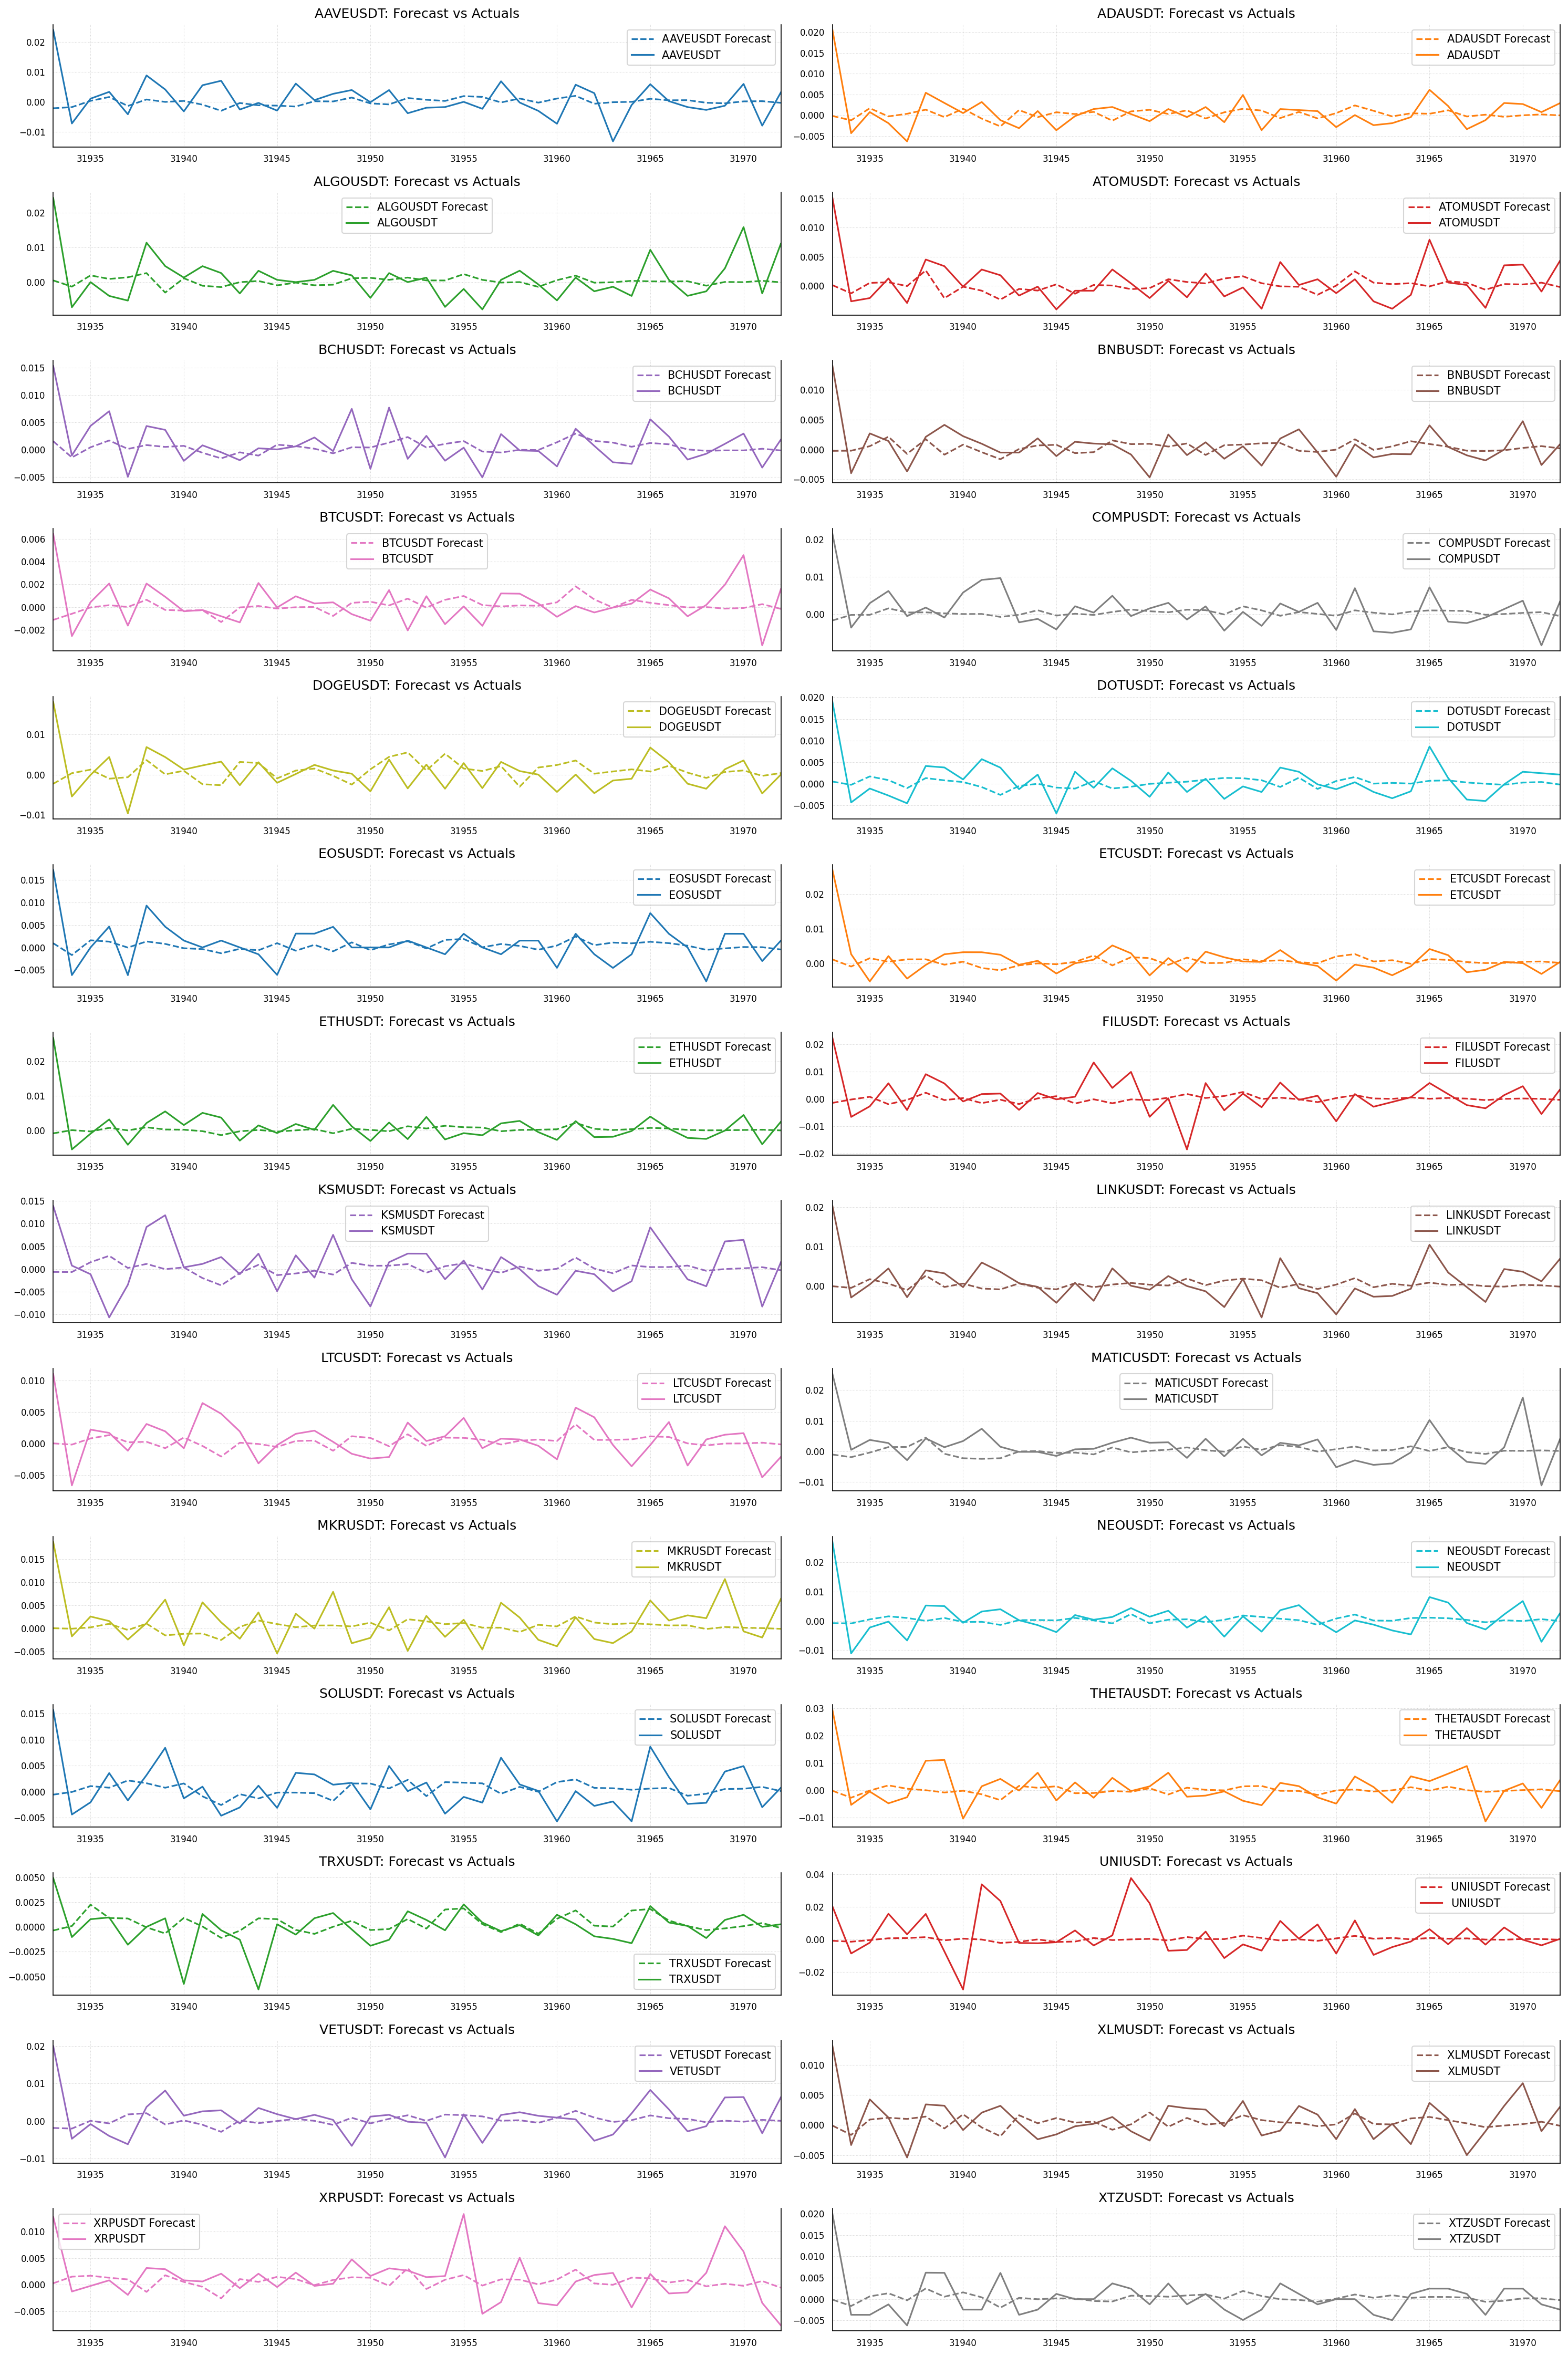

In [11]:
fig, axes = plt.subplots(nrows=int(len(df_returns.columns)/2), ncols=2, dpi=150, figsize=(20,30))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i, (col, ax) in enumerate(zip(df_returns.columns, axes.flatten())):
    df_forecast[col + " Forecast"].plot(legend=True, ax=ax, color=colors[i], linestyle='--', linewidth=1.5).autoscale(axis='x', tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax, color=colors[i], linewidth=1.5)
    ax.set_title(col + ": Forecast vs Actuals", fontsize=12)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=8)
    ax.grid(linestyle=':', linewidth=0.5, alpha=0.6)

plt.tight_layout()